# Multi-label classification

Contents:

- [Classification problems](#Classification-problems)
- [Theory - main approaches](#Theory---main-approaches)
    - [Problem-transformation methods](#Problem-transformation-methods)
        - [Binary relevance](#Binary-relevance)
        - [Classifier chaining](#Classifier-chaining)
        - [Label power-set](#Label-power-set-method)
    - [Algorithm adaptation methods](#Algorithm-adaptation-methods)
        - [Multi-Label-C4.5](#Multi-Label-C4.5)
        - [Predictive-clustering-trees-(PCTs)](#Predictive-clustering-trees)
    - [Ensemble methods](#Ensemble-methods)
        - [Ensembles of classifier chains](#Ensembles-of-classifier-chains)
        - [ Random forest of PCT](#Random-forest-of-predictive-clustering-trees)
- [Multilabel classification with scikit-learn](#Multi-label-classification-with-scikit-learn)
    - [Read and clean data](#Read-and-clean-data)
    - [Build model - RandomForest](#Build-model---random-forest)
    - [Build model - OneVsRest](#Build-model---OneVsRest)
    - [Build model - ClassifierChain](#Build-model---ClassifierChain)
- [Multilabel classification with scikit-multilearn](#Multi-label-classification-with-scikit-multilearn)    

# Classification problems

- Binary
    - Email: ham or spam
    - Customer churn: churn or not churn

$X$ | $y$
-|-
$X_1$ | 0
$X_2$ | 1

- Multi-class
    - Movie review sentiment: positive, neutral, negative
    - Credit score: high risk, normal, low risk
    
$X$ | $y_1$ | $y_2$ | $y_3$
-|-|-
$X_1$ | 0 | 1 | 0
$X_2$ | 1 | 0 | 0
    
- Multi-label
    - Article: Sport & entertainment, business & education
    - Paper: machine learning & computer science, computer science & human-computer interaction
    - Image: tag objects in an image

$X$ | $y_1$ | $y_2$ | $y_3$
-|-|-
$X_1$ | 1 | 1 | 0
$X_2$ | 1 | 0 | 0




# Theory - main approaches

- See paper: [An extensive experimental comparison of methods for multi-label learning](http://kt.ijs.si/DragiKocev/wikipage/lib/exe/fetch.php?media=2012pr_ml_comparison.pdf)

![alt text](https://lh6.googleusercontent.com/9B-9IS4BiusgMT8SpdPMQiVrNFE9Ufyp7u9a5lW7l_InBiafVC2tO1LdJg3AhOtpEzkx4GQmuTp23B8pJpyD=w1280-h663 "Multi-label learning methods")


## Problem transformation methods 

### Binary relevance

Binary relevance is the well known one-against-all
strategy. It addresses the multi-label learning problem by learning
one classifier for each label, using all the examples labeled
with that label as positive examples and all remaining examples
as negative. When making a prediction, each binary classifier
predicts whether its label is relevant for the given example or not,
resulting in a set of relevant labels. 


$X$ | $\hat{y}_1$ | $\hat{y}_2$ | $\hat{y}_3$ 
-|-|-
$X_1$ | $C_1$($X_1$) | $C_2$($X_1$) | $C_3$($X_1$)
$X_2$ | $C_1$($X_2$) | $C_2$($X_2$) | $C_3$($X_2$)

where $C_k$ is the binary classifier for label $k$ vs. others.



### Classifier chaining

The classifier chaining method involves Q binary
classifiers as in BR. Classifiers are linked along a chain where
the i-th classifier deals with the binary relevance problem
associated with the corresponding label. The feature space of each
link in the chain is extended with the 0/1 label associations of all
previous links. 

$X$ | $\hat{y}_1$ | $\hat{y}_2$ | $\hat{y}_3$ 
-|-|-
$X_1$ | $C_1$($X_1$) | $C_2$($X_1$, $y_{11}$) | $C_3$($X_1$, $y_{11}$, $y_{12}$)
$X_2$ | $C_1$($X_2$) | $C_2$($X_2$, $y_{21}$) | $C_3$($X_2$, $y_{21}$, $y_{22}$)

where $C_k$ is the binary classifier for label $k$ vs. others.


### Label power-set method

Hierarchy Of Multi-label classifiERs (HOMER) is an algorithm
for effective and computationally efficient multi-label learning in
domains with a large number of labels. HOMER constructs a hierarchy of multi-label classifiers, each one dealing with a much
smaller set of labels compared to Q (the total number of labels) and a
more balanced example distribution. One of the main processes within
HOMER is the even distribution of a set of labels into k disjoint
subsets so that similar labels are placed together and dissimilar apart.
For more information, see http://lpis.csd.auth.gr/publications/tsoumakas-mmd08.pdf

## Algorithm adaptation methods 

### Multi-Label C4.5

Modified the formula for calculating entropy for solving multilabel
problems. The modified entropy sums the entropies for each
individual class label. 

### Predictive clustering trees

Predictive clustering trees (PCTs) are decision trees viewed
as a hierarchy of clusters: the top-node corresponds to one cluster
containing all data, which is recursively partitioned into smaller
clusters while moving down the tree. PCTs for multi-label classification are constructed using a
standard top-down induction of decision trees algorithm, where
the splitting and stopping criterion is defined using the label information (unlike 
normal clustering which is unsupervised). 

## Ensemble methods

### Ensembles of classifier chains

ECC is a technique which ensemble multiple classifier chains $C_1$, $C_2$, ..., $C_m$. Each $C_k$ is trained with:

- a random chain ordering (of L) and
- a random subset of data 

Hence each $C_k$ model is likely to be unique and able to give
different multi-label predictions. These predictions are summed
per label so that each label receives a number of votes. A
threshold is used to select the most popular labels which form
the final predicted multi-label set.

### Random forest of predictive clustering trees

Random forest where each tree is a PCT. 

# Performance metrics

- *Hamming loss*: measures the fraction of instances that are incorrectly predicted **per label**, averaged over the labels.
- *Accuracy*: measures the fraction of instances that are correctly predicted (it uses subset accuracy: the set of labels predicted for a sample must **exactly match** the true set of labels).
- *Jaccard similarity*: measures the proportion of predicted labels for a sample to its correct assignment, averaged over samples
- Precision, recall, F1

In [92]:
y_true = np.array([[0, 1], [1, 1]])
y_pred = np.zeros((2, 2))

In [93]:
y_true

array([[0, 1],
       [1, 1]])

In [94]:
y_pred

array([[0., 0.],
       [0., 0.]])

In [95]:
from sklearn.metrics import hamming_loss, accuracy_score, jaccard_similarity_score

In [96]:
# (0.5 + 1.0) / 2 
hamming_loss(y_true, y_pred)

0.75

In [97]:
# 0 / 2
accuracy_score(y_true, y_pred)

0.0

In [124]:
jaccard_similarity_score(y_true, y_pred)

0.0

In [125]:
jaccard_similarity_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))

0.75

# Multi-label classification with scikit-learn

Data
- Toxic comments from a Kaggle challenge, 
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

Multi-label classifiers in scikit-learn:
- One-vs-the-rest classifier, http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
- Classifier chain, http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.ClassifierChain.html


In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
#import scikitplot as skplt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

## Read and clean data

In [11]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Let's take a look at a few examples.

In [13]:
train_df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
124334,991e4179b7c2dad4,BerksGuy \n\nI'm want you to know that if this...,0,0,0,0,0,0
125715,a084c5e83a0d3dab,Congratulations and welcome back.,0,0,0,0,0,0
145677,207d8dab89ee7f0c,Only if the author has been acknowledged as an...,0,0,0,0,0,0
42678,71e8e95f6177fad1,Go and fall off a cliff and die you pathetic b...,1,0,0,0,1,0
49150,836617ab6af5d6b6,Relations\nDo you think the Federal Republic o...,0,0,0,0,0,0


In the training data, the comments are labelled as one or more of the six categories; toxic, severe toxic, obscene, threat, insult and identity hate. This is essentially a multi-label classification problem.

In [31]:
target_cols = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [17]:
# check target columns
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
train_df[target_cols].sum()

obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64

We see that majority of the comments are not labelled in one or more of these categories. This is imbalanced dataset.

Next let's see if there are correlations between the targets

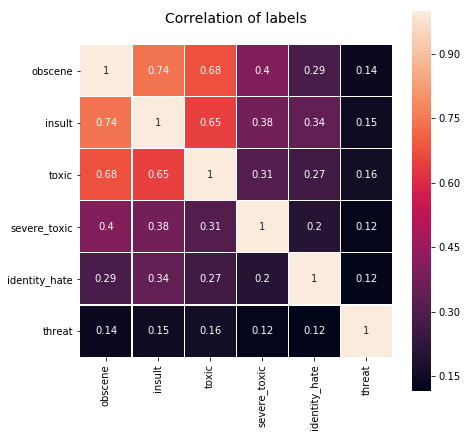

In [26]:
plt.figure(figsize=(7,7))
plt.title('Correlation of labels',y=1.05,size=14)
sns.heatmap(train_df[target_cols].astype(float).corr(),
            linewidths=0.1, vmax=1.0, square=True,
           linecolor='white', annot=True)


In [27]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [28]:
train_df['comment_text'] = train_df['comment_text'].map(clean_text)

In [29]:
train_df.to_csv('train_cleaned.csv', index=None)

In [30]:
!wc -l train_cleaned.csv

  159572 train_cleaned.csv


## Build model - random forest

In [47]:
df = pd.read_csv('train_cleaned.csv')
X = df['comment_text']
y = df[target_cols]

In [48]:
xtrain, xval, ytrain, yval = train_test_split(X, y, test_size=0.5, random_state=1110)
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((79785,), (79786,), (79785, 6), (79786, 6))

In [49]:
ytrain.head()

,obscene,insult,toxic,severe_toxic,identity_hate,threat
51860,0,0,0,0,0,0
135662,0,0,0,0,0,0
76368,0,0,0,0,0,0
114580,0,0,0,0,0,0
7859,0,0,1,0,0,0


In [50]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(strip_accents='ascii', stop_words='english', max_features=5000)),
    ('clf', RandomForestClassifier(n_estimators=200, class_weight='balanced',
                                   bootstrap=True, oob_score=True, n_jobs=-1)),
])

rf = pipeline.fit(xtrain, ytrain)

In [51]:
metrics.accuracy_score(rf.predict(xtrain), ytrain)

0.9882434041486495

In [52]:
metrics.accuracy_score(rf.predict(xval), yval)

0.8902313689118392

In [53]:
metrics.hamming_loss(rf.predict(xval), yval)

0.03819592409695936

## Build model - OneVsRest

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(strip_accents='ascii', stop_words='english', max_features=5000)),
    ('clf', OneVsRestClassifier(LogisticRegression())),
])

ovr = pipeline.fit(xtrain, ytrain)

In [58]:
metrics.accuracy_score(ovr.predict(xval), yval)

0.9184443386057705

In [59]:
metrics.hamming_loss(ovr.predict(xval), yval)

0.019579458384511902

## Build model - ClassifierChain

As an exercise, go build a classifier using Classifier Chain method.

# Multi-label classification with scikit-multilearn

Using the skmultilearn package (still under development). See http://scikit.ml/userguide.html

In [65]:
!pip install scikit-multilearn

    100% |████████████████████████████████| 71kB 694kB/s 
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [66]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC

In [67]:
vect = TfidfVectorizer(strip_accents='ascii', stop_words='english', max_features=5000)

In [69]:
clf = BinaryRelevance(
    classifier=SVC(),
    # X, y in dense format?
    require_dense=[False, True]
)

clf.fit(vect.fit_transform(xtrain), ytrain)

BinaryRelevance(classifier=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
        require_dense=[False, True])

In [71]:
xval_mat = vect.transform(xval)
ypred = clf.predict(xval_mat)

In [86]:
print(f"accuracy: {metrics.accuracy_score(yval, ypred)}")
print(f"hamming loss: {metrics.hamming_loss(yval, ypred)}")

accuracy: 0.8987667009249743
hamming loss: 0.03640362970947284
